In [80]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import math
import pandas as pd

In [8]:
mean1 = np.array([2.5,2.5])
cov1 = np.array([[2,-0.8],[-0.8,2]])
N1 = 500
X1 = np.random.multivariate_normal(mean1, cov1, N1)
label1 = 1

In [7]:
mean2 = np.array([0,0])
cov2 = np.array([[1,0],[0,1]])
N2 = 1000
X2 = np.random.multivariate_normal(mean2, cov2, N2)
label2 = 0

In [18]:
x1_min, x1_max=min(X[:,0]), max(X[:,0])
x2_min, x2_max=min(X[:,1]), max(X[:,1])
Neval=30;h1=(x1_max-x1_min)/Neval;h2=(x2_max-x2_min)/Neval
x1Eval, x2Eval=np.meshgrid(np.arange(x1_min, x1_max, h1), np.arange(x2_min, x2_max, h2));

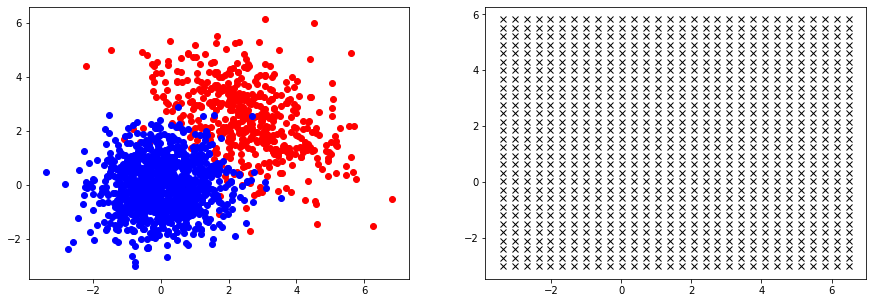

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(X1[:,0],X1[:,1],'ro')
plt.plot(X2[:,0],X2[:,1],'bo')
plt.subplot(122)
plt.plot(x1Eval,x2Eval,'kx')
plt.show()

In [9]:
x1,x2 = [],[]
for i in range(N1):
    x1 += [list(X1[i,]) + [label1]]
for i in range(N2):
    x2 += [list(X2[i,]) + [label2]]
X = np.array(x1+x2)  

## classification tree decision

### model calibration

In [20]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

##### decision tree

In [39]:
tree = DecisionTreeClassifier()
treefit = tree.fit(X[:,0:2], X[:,2])

In [40]:
pY_train = tree.predict_proba(X[:,0:2])

In [41]:
predxclass = np.argmax(pY_train, axis = 1)

In [42]:
E_train = (X[:,2] != predxclass).sum()/len(predxclass)
print("Error on current training test is %f", E_train)

Error on current training test is %f 0.0


In [43]:
from sklearn.tree import export_text
r = export_text(treefit)
#print(r)

### score and decisions boundaries

In [44]:
grid = np.array(list(zip(list(x1Eval.flat),list(x2Eval.flat))))
pY_grid = tree.predict_proba(grid)
predxclass_grid = np.argmax(pY_grid, axis=1)

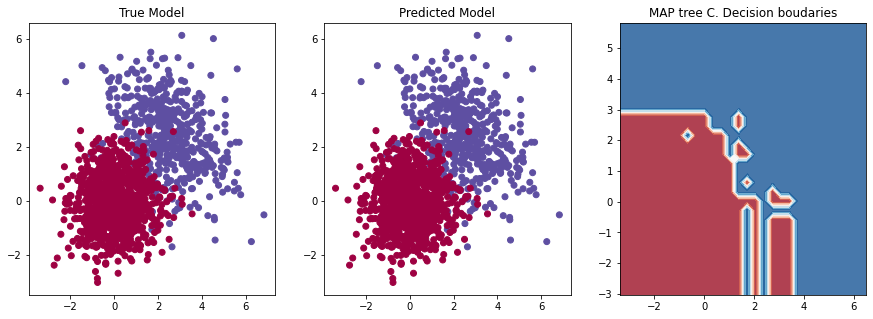

In [47]:
plt.figure(figsize=(15,5))
plt.subplot(132)
plt.scatter(X[:,0],X[:,1],c = predxclass,cmap = 'Spectral')
plt.title('Predicted Model')
plt.subplot(131)
plt.scatter(X[:,0],X[:,1],c = X[:,2],cmap = 'Spectral')
plt.title('True Model')
ax = plt.subplot(133)
ax.set_title('MAP tree C. Decision boudaries')
predxclass_grid = predxclass_grid.reshape(x1Eval.shape)
cm = plt.cm.RdBu
ax.contourf(x1Eval, x2Eval, predxclass_grid, cmap=cm, alpha=.8);

In [49]:
tree = DecisionTreeClassifier(min_samples_split= 20,
                             min_samples_leaf = 10)

In [51]:
treefit = tree.fit(X[:,0:2], X[:,2])
pY_train = tree.predict_proba(X[:,0:2])
predxclass = np.argmax(pY_train, axis = 1)
E_train = (X[:,2] != predxclass).sum()/len(predxclass)
print("Error on current training test is %f", E_train)

Error on current training test is %f 0.036


In [52]:
## grid 
grid = np.array(list(zip(list(x1Eval.flat),list(x2Eval.flat))))
pY_grid = tree.predict_proba(grid)
predxclass_grid = np.argmax(pY_grid, axis=1)

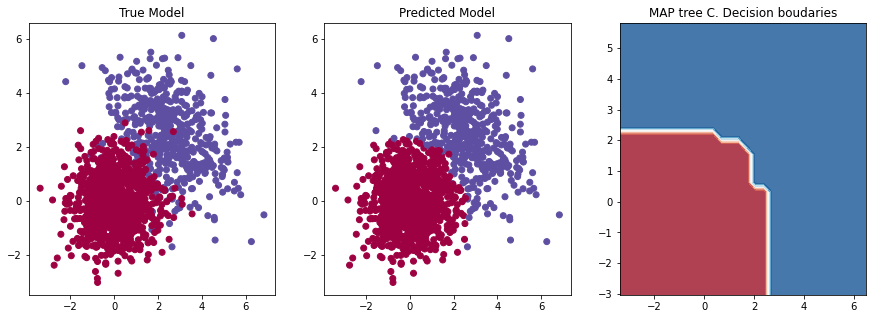

In [53]:
plt.figure(figsize=(15,5))
plt.subplot(132)
plt.scatter(X[:,0],X[:,1],c = predxclass,cmap = 'Spectral')
plt.title('Predicted Model')
plt.subplot(131)
plt.scatter(X[:,0],X[:,1],c = X[:,2],cmap = 'Spectral')
plt.title('True Model')
ax = plt.subplot(133)
ax.set_title('MAP tree C. Decision boudaries')
predxclass_grid = predxclass_grid.reshape(x1Eval.shape)
cm = plt.cm.RdBu
ax.contourf(x1Eval, x2Eval, predxclass_grid, cmap=cm, alpha=.8);

### bagging

In [70]:
#baging
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.ensemble import BaggingClassifier

#treemod= tree.DecisionTreeClassifier()

treemod = DecisionTreeClassifier(min_samples_split= 20,
                             min_samples_leaf = 10)

bagmod = BaggingClassifier(base_estimator=treemod,
                           n_estimators=10,
                           random_state=0)
treemodfit = treemod.fit(X[:,0:2], X[:,2])
bagmodfit = bagmod.fit(X[:,0:2], X[:,2])

pY_train = bagmodfit.predict_proba(X[:,0:2])
predxclass = np.argmax(pY_train, axis = 1)

In [71]:
E_train = (X[:,2] != predxclass ).sum() / len(predxclass)
print("Error on training set is %f",E_train)

Error on training set is %f 0.03266666666666666


In [72]:
pY_grid = bagmodfit.predict_proba(grid)
predxclass_grid = np.argmax(pY_grid, axis=1)

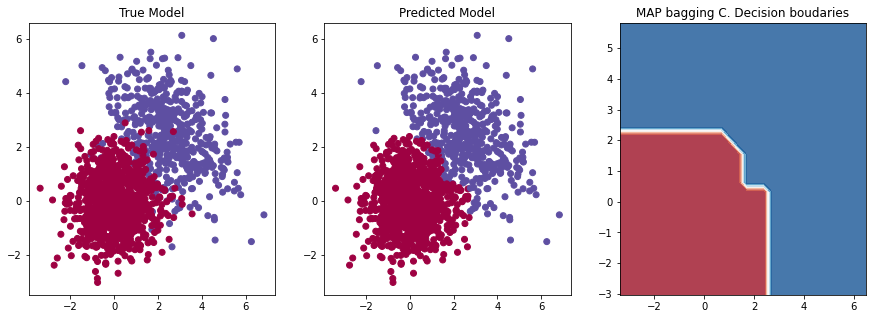

In [73]:
plt.figure(figsize=(15,5))
plt.subplot(132)
plt.scatter(X[:,0],X[:,1],c = predxclass,cmap = 'Spectral')
plt.title('Predicted Model')
plt.subplot(131)
plt.scatter(X[:,0],X[:,1],c = X[:,2],cmap = 'Spectral')
plt.title('True Model')
ax = plt.subplot(133)
ax.set_title('MAP bagging C. Decision boudaries')
predxclass_grid = predxclass_grid.reshape(x1Eval.shape)
cm = plt.cm.RdBu
ax.contourf(x1Eval, x2Eval, predxclass_grid, cmap=cm, alpha=.8);

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [75]:
RF = RandomForestClassifier(max_depth=2,
                           random_state=0)
RFfit = RF.fit(X[:,0:2], X[:,2])
pY_train = RFfit.predict_proba(X[:,0:2])

predxclass = np.argmax(pY_train, axis=1)

In [76]:
E_train = (X[:,2] != predxclass ).sum() / len(predxclass)
print("Error on training set is %f",E_train)

Error on training set is %f 0.036


In [78]:
pY_grid = RFfit.predict_proba(grid)
predxclass_grid = np.argmax(pY_grid, axis=1)

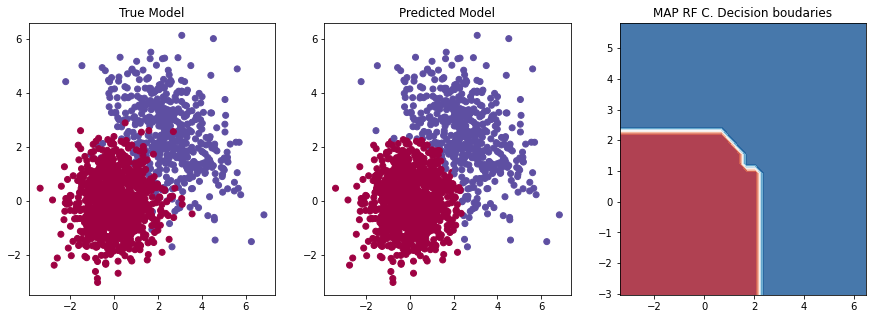

In [79]:
plt.figure(figsize=(15,5))
plt.subplot(132)
plt.scatter(X[:,0],X[:,1],c = predxclass,cmap = 'Spectral')
plt.title('Predicted Model')
plt.subplot(131)
plt.scatter(X[:,0],X[:,1],c = X[:,2],cmap = 'Spectral')
plt.title('True Model')
ax = plt.subplot(133)
ax.set_title('MAP RF C. Decision boudaries')
predxclass_grid = predxclass_grid.reshape(x1Eval.shape)
cm = plt.cm.RdBu
ax.contourf(x1Eval, x2Eval, predxclass_grid, cmap=cm, alpha=.8);

In [117]:
data = pd.read_csv('/home/unclevhins/Downloads/MAL2021/SAheart.txt')

In [118]:
data.head(5)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [119]:
data['famhist'] = (data['famhist'] == 'Present')*1.0
data.head(5)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,1.0,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,0.0,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,1.0,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,1.0,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,1.0,60,25.99,57.34,49,1


In [120]:
Y = data.loc[:,'chd']
X = (data
     .iloc[:,0:data.shape[1]-1]
    .to_numpy())

In [121]:
### model
tree = DecisionTreeClassifier()
bagging = BaggingClassifier()
RF = RandomForestClassifier()

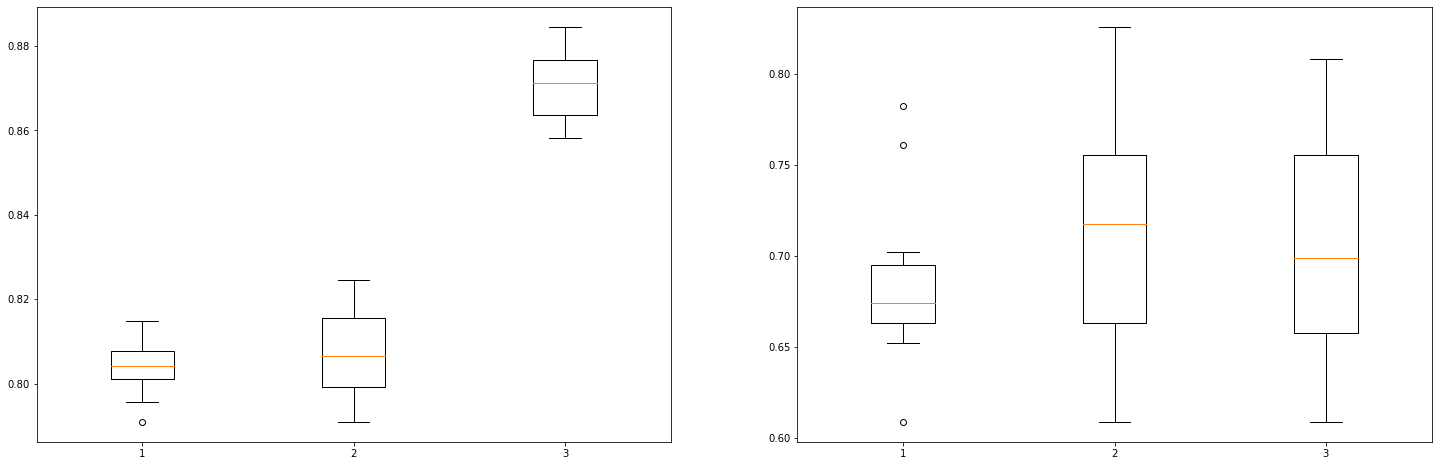

In [139]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn import metrics

models = [tree, bagging, RF ]
models_name = ['tree', 'bagging', 'RF']
kf = KFold(n_splits= 10,shuffle=True)

data_train = pd.DataFrame(columns = {'tree' : [],
                               'bagging' : [],
                               'RF' : []})

data_test = pd.DataFrame(columns = {'tree' : [],
                               'bagging' : [],
                               'RF' : []})
j = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    ### model
    tree = DecisionTreeClassifier(min_samples_split= 30,
                                  min_samples_leaf = 10)
    
    bagging = BaggingClassifier(n_estimators=20,
                               base_estimator=tree,
                               random_state=0)
    
    RF = RandomForestClassifier(max_depth=5,
                           random_state=0)
    i = 0
    for x in models:
        xfit = x.fit(X_train, y_train)
        pY_train = xfit.predict_proba(X_train)
        pY_test = xfit.predict_proba(X_test)
        
        predxclass_train = np.argmax(pY_train, axis=1)
        predxclass_test = np.argmax(pY_test, axis=1)
        
        
        data_test.loc[j,models_name[i]] = metrics.accuracy_score(y_test,predxclass_test)
        data_train.loc[j,models_name[i]] = metrics.accuracy_score(y_train,predxclass_train)
        i+=1
    j+=1
#data = [accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, f1_train, f1_test, auc_train, auc_test]

plt.figure(figsize=(25,8))
ax = plt.subplot(121)
ax.boxplot(data_train)
ax = plt.subplot(122)
ax.boxplot(data_test)
plt.show()

In [140]:
data_train

,tree,bagging,RF
0,0.80241,0.792771,0.872289
1,0.812048,0.80241,0.862651
2,0.795673,0.807692,0.875
3,0.800481,0.790865,0.865385
4,0.790865,0.817308,0.877404
5,0.805288,0.798077,0.879808
6,0.807692,0.810096,0.862981
7,0.807692,0.817308,0.870192
8,0.802885,0.805288,0.858173
9,0.814904,0.824519,0.884615


In [135]:
data_test

,tree,bagging,RF
0,0.545455,0.65368,0.645022
1,0.705628,0.722944,0.679654


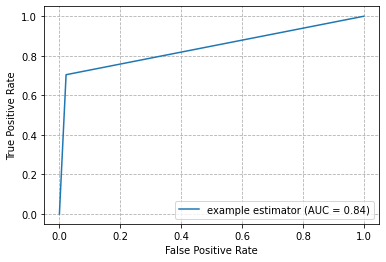

In [142]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, predxclass_train)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
display.plot()
plt.grid(linestyle = 'dashed')
plt.show()

In [145]:
pY_train

array([[0.19573581, 0.80426419],
       [0.44471545, 0.55528455],
       [0.77097729, 0.22902271],
       [0.14010584, 0.85989416],
       [0.41223341, 0.58776659],
       [0.71804481, 0.28195519],
       [0.39103835, 0.60896165],
       [0.86819658, 0.13180342],
       [0.3831786 , 0.6168214 ],
       [0.316372  , 0.683628  ],
       [0.41072446, 0.58927554],
       [0.93032051, 0.06967949],
       [0.94120084, 0.05879916],
       [0.65338698, 0.34661302],
       [0.79416963, 0.20583037],
       [0.70363436, 0.29636564],
       [0.13439516, 0.86560484],
       [0.24238246, 0.75761754],
       [0.20759783, 0.79240217],
       [0.47946184, 0.52053816],
       [0.735512  , 0.264488  ],
       [0.56065935, 0.43934065],
       [0.64780201, 0.35219799],
       [0.57341169, 0.42658831],
       [0.43850787, 0.56149213],
       [0.64686611, 0.35313389],
       [0.23663879, 0.76336121],
       [0.42489133, 0.57510867],
       [0.41239748, 0.58760252],
       [0.64595865, 0.35404135],
       [0.

In [115]:
data['famhist'] = (data['famhist'] == 'Present')*1.0

In [116]:
data

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,1.0,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,0.0,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,1.0,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,1.0,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,1.0,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,0.0,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,0.0,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,0.0,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,0.0,64,27.35,23.97,40,0
